# Pregunta 5

(3 puntos) Con análisis morfológico analice la imagen llamada Ex3Preg5.tif

a. (1 punto) Haga una función que automáticamente cuente cuantas letras hay en la imagen.

b. (1 punto) Haga una función que automáticamente cuentecuantas letras mayúsiculas hay en la imagen, la función debe regresar también una tabla cuyas columnas indiquien el renglón y el número de letra en el que aparece la mayúsculaen dicho renglón, habrá una fila de esta tabla por cada mayúsucula encontrada.

c. (1 punto) Haga una función que automáticamente cuentecuantas letras “o”minúsculas hay en la imagen.La función debe regresar también una tabla cuyas columnas indiquien el renglón y el número de letra en el que aparece la “o”en dicho renglón, habrá una fila de esta tabla por cada “o”encontrada

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract

In [66]:
letritas = cv2.imread('imagenes/Ex3Preg5.tif', 0)

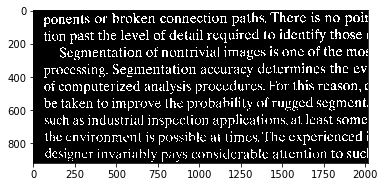

In [67]:
plt.imshow(letritas, cmap = 'gray');

In [68]:
print(pytesseract.image_to_string(letritas))

ponents or broken connection paths. There is no poir
tion past the level of detail required to identify those c

Segmentation of nontrivial images is one of the mos
processing. Segmentation accuracy determines the evi
of computerized analysis procedures. For this reason, c
be taken to improve the probability of rugged segment:
such as industrial inspection applications, at least some
the environment is possible at timesThe experienced i
designer invariably pays considerable attention to sucl


Hay que deshacerse de las letras partidas de la orilla derecha.

In [96]:
ancho = letritas.shape[0]
largo = letritas.shape[1]
marcador = np.zeros((ancho, largo), dtype = "uint8")
marcador[0] = np.ones(largo, dtype = "uint8")
marcador[ancho - 1] = np.ones(largo, dtype = "uint8")
marcador[:, 0] = np.ones(ancho, dtype = "uint8").T
marcador[:, largo - 1] = np.ones(ancho, dtype = "uint8").T
marcador = marcador * letritas
marcador = np.uint8(marcador)

In [95]:
kernel = np.ones((3, 3), np.uint8)

In [97]:
D_vieja = marcador
D_nueva = np.bitwise_and(cv2.dilate(marcador, kernel, iterations = 1), letritas)

In [99]:
while np.array_equal(D_nueva, D_vieja) == False:
    D_vieja = D_nueva
    D_nueva = np.bitwise_and(cv2.dilate(D_nueva, kernel, iterations = 1), letritas)

In [100]:
resultado = letritas - D_nueva

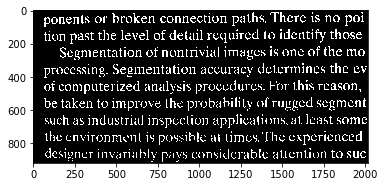

In [101]:
plt.imshow(resultado, cmap = 'gray')